In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

### Data Transformation

In [2]:
df = pd.read_csv(r'..\\code\\datasets\\diabetic_data.csv')

In [3]:
df.drop(columns = ['encounter_id','patient_nbr','weight', 'medical_specialty'], inplace=True)
df = df[df.race!='?']
df = df[df.gender!='Unknown/Invalid']
df = df[df.payer_code!='?']
df.replace(to_replace=['Steady', 'Down', 'Up', '>30', '<30'], value='YES', inplace=True)

In [4]:
df_breakout = pd.get_dummies(df, columns=["race","gender", "age", "admission_type_id", "discharge_disposition_id","admission_source_id",
                                          "payer_code", "diag_1", "diag_2", "diag_3", "max_glu_serum", "A1Cresult", "metformin", "repaglinide",
                                          "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide",
                                          "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton",
                                          "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone",
                                          "metformin-pioglitazone", "change", "diabetesMed"], drop_first=True)

**Split dataset into train and test sets**

In [5]:
X = df_breakout.drop(columns = 'readmitted')
y = df_breakout.readmitted
y.replace(to_replace=['>30', '<30'], value='YES', inplace=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Random Forest Classifier

In [7]:
clf = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_features = 'sqrt', random_state=0, n_jobs = -1)
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)
predSeries = pd.Series(prediction)

clf.score(X_test, y_test)

0.6552254783888666

In [8]:
y_test = y_test.reset_index(drop = 'True')
ML_result = pd.concat([y_test, predSeries], axis=1)
ML_result.columns = ['True','Predicted']
confusion_matrix = pd.crosstab(ML_result['True'], ML_result['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    NO   YES
Actual               
NO         5816  2131
YES        3022  3977


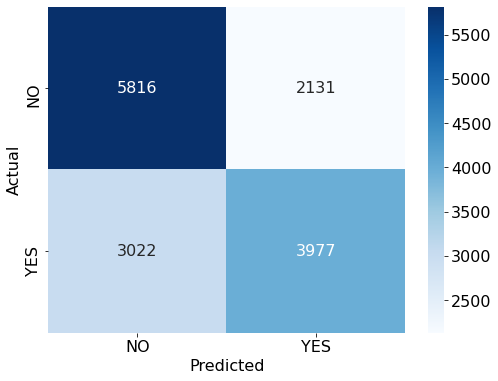

In [9]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams.update({'font.size': 16})

sns.heatmap(confusion_matrix,annot=True,cmap='Blues', fmt='g')
plt.show()

### Ridge Classifier

In [10]:
rdg = RidgeClassifier(alpha=70).fit(X_train, y_train)
prediction = rdg.predict(X_test)
predSeries = pd.Series(prediction)

rdg.score(X_test, y_test)

0.6492038003479191

In [11]:
y_test = y_test.reset_index(drop = 'True')
ML_result = pd.concat([y_test, predSeries], axis=1)
ML_result.columns = ['True','Predicted']
confusion_matrix = pd.crosstab(ML_result['True'], ML_result['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    NO   YES
Actual               
NO         5915  2032
YES        3211  3788


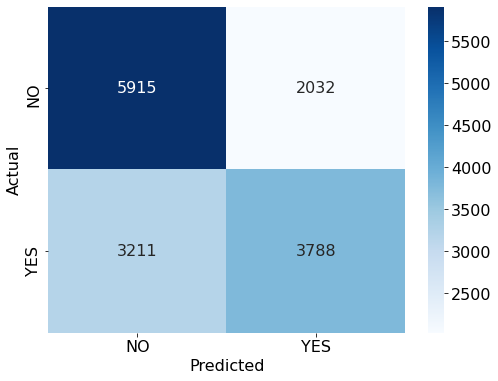

In [12]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams.update({'font.size': 16})

sns.heatmap(confusion_matrix,annot=True,cmap='Blues', fmt='g')
plt.show()

### Random Forest: Most Important Features

In [13]:
feature_importances_df = pd.DataFrame({"feature": list(X.columns), "importance": clf.feature_importances_}
    ).sort_values("importance", ascending=False
    ).sort_values(by='importance', ascending = False)

In [14]:
feature_importances_df.head(10)

,feature,importance
1,num_lab_procedures,0.051404
3,num_medications,0.048647
6,number_inpatient,0.039850
0,time_in_hospital,0.036531
7,number_diagnoses,0.028057
2,num_procedures,0.024810
4,number_outpatient,0.017333
5,number_emergency,0.016271
12,gender_Male,0.013677
2185,insulin_YES,0.010174


In [15]:
feature_importances_df.tail(10)

,feature,importance
259,diag_1_336,0.0
370,diag_1_471,0.0
699,diag_1_968,0.0
318,diag_1_412,0.0
1930,diag_3_78,0.0
1154,diag_2_665,0.0
1971,diag_3_834,0.0
1437,diag_3_111,0.0
1881,diag_3_702,0.0
689,diag_1_955,0.0
